### Etapas:
- Preparação e Estruturação de Dados: Criação de uma matriz de exportação entre 10 países escolhidos com valores fictícios em milhões de dólares.
- Construção da Rede: Geração de um grafo direcionado para representar as relações de exportação.
- Visualização e Análise de Rede: Utilização de um layout circular e representação visual das relações e valores de exportação entre países.
- Métricas de Rede: Cálculo das importações e exportações para cada país para entender o fluxo de comércio.
- Interpretação de Dados e Insights: Identificação do país com o maior volume de exportações para entender as dinâmicas comerciais globais.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lista de países selecionados
countries = ['Brasil', 'Estados Unidos', 'China', 'Alemanha', 'Índia', 'Rússia', 'Japão', 'França', 'Itália', 'Canadá']

In [3]:
# Preparação e Estruturação de Dados
# Gerando dados fictícios de exportação entre os países (valores em milhões de dólares)
np.random.seed(42)  # Para resultados consistentes
data = {country: np.random.randint(0, 1000, size=len(countries)) for country in countries}
export_df = pd.DataFrame(data, index=countries)

In [4]:
# Ajustando a diagonal para zero, pois um país não exporta para si mesmo
np.fill_diagonal(export_df.values, 0)

In [5]:
# Construção da Rede
# Criando um grafo direcionado a partir da matriz de exportações
G = nx.from_pandas_adjacency(export_df, create_using=nx.DiGraph())

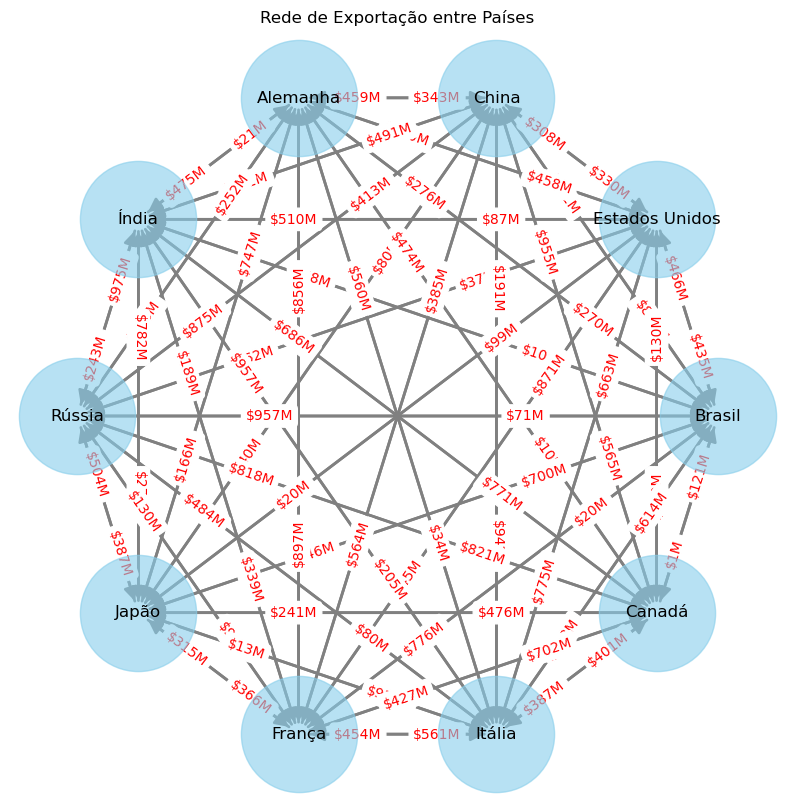

In [6]:
# Visualização e Análise de Rede com NetworkX
# Desenhando o grafo com a biblioteca matplotlib
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G)  # Posicionamento circular para melhor visualização
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='skyblue', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"${d['weight']}M" for u, v, d in G.edges(data=True)}, label_pos=0.3, font_color='red')
plt.title('Rede de Exportação entre Países')
plt.axis('off')
plt.show()


In [7]:
# Métricas de Rede
# Calculando o grau de entrada (importações) e saída (exportações) para cada país
in_degree = G.in_degree(weight='weight')
out_degree = G.out_degree(weight='weight')
print("Importações por país (Grau de entrada):", in_degree)
print("Exportações por país (Grau de saída):", out_degree)

Importações por país (Grau de entrada): [('Brasil', 3197), ('Estados Unidos', 3476), ('China', 4552), ('Alemanha', 3805), ('Índia', 5313), ('Rússia', 5139), ('Japão', 2901), ('França', 4259), ('Itália', 4423), ('Canadá', 4231)]
Exportações por país (Grau de saída): [('Brasil', 4349), ('Estados Unidos', 3504), ('China', 6116), ('Alemanha', 3314), ('Índia', 2536), ('Rússia', 3462), ('Japão', 5410), ('França', 4029), ('Itália', 4337), ('Canadá', 4239)]


In [8]:
# Interpretação de Dados e Insights
# Identificando o país com maior volume de exportações
max_export_country = max(out_degree, key=lambda x: x[1])
print(f"País com maior volume de exportações: {max_export_country[0]} com ${max_export_country[1]}M")

País com maior volume de exportações: China com $6116M
